In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4
import scipy
from scipy import stats

In [2]:
nino = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 4\nino3.4.nc')
nino34 = nino.sst.loc['1981-04-01':'2021-09-01']

#chazhi_nino34 = nino34.value

In [3]:
f = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 4\Monday\correction.nc')
ds = f.__xarray_dataarray_variable__
nds = ds.loc[:,5:-5.1,120:180]

varnds = nds.rolling(time = 91, center = True).var().dropna("time")

a = varnds.values
b = np.sqrt(a)
lat = varnds['lat']
lon = varnds['lon']
time = varnds['time']

sqrtvar = xr.DataArray(b,
coords = {'time' : time, 'lat' : lat, 'lon' : lon},
dims = ["time", "lat", "lon"])

a =sqrtvar.mean(axis=(1,2))
a

<xarray.DataArray (time: 14885)>
array([12.81732519, 12.99545919, 13.18234462, ...,  7.42605583,
        7.38061666,  7.33802967])
Coordinates:
  * time     (time) datetime64[ns] 1981-02-15 1981-02-16 ... 2021-11-16

In [4]:
OLR = a.resample(time ="M").mean(dim="time")
Nino34 = nino34

In [5]:
OLR_5 = OLR.rolling(time = 5, center = True).mean().dropna("time")
OLR_5

<xarray.DataArray (time: 486)>
array([13.29828367, 12.26268175, 11.03283753,  9.8330406 ,  9.4313281 ,
       10.47158354, 11.74913265, 12.6062812 , 12.69719217, 12.4584782 ,
       11.8776049 , 11.35198329, 11.13355476, 11.60092318, 12.08304454,
       12.3472993 , 12.47024616, 12.56523263, 12.48383745, 11.99310665,
       11.07612906,  9.83682867,  8.73716965,  8.13050483,  8.02075692,
        8.13312604,  8.31467728,  8.53996326,  8.4916719 ,  8.37048329,
        8.04235615,  7.83705011,  7.55309099,  7.49572832,  7.60097725,
        7.88939167,  8.07377373,  8.4521942 ,  8.82683777,  9.17479191,
        9.45200782,  9.96942443, 10.4990508 , 11.49142623, 12.52875284,
       13.49579117, 13.55035555, 12.84354504, 11.44286669, 10.02896285,
        8.8933732 ,  8.55801232,  8.66426662,  8.77697773,  8.81237465,
        8.93358076,  9.35749781, 10.31550335, 11.29195114, 12.16853041,
       12.30847714, 12.08212523, 11.39160543, 10.94107585, 10.82332746,
       11.22172796, 11.61586594, 12.32631755, 13.18961273, 13.92439154,
       14.58714209, 14.88187755, 14.76368121, 14.07280201, 13.3400546 ,
       13.15044491, 13.50701546, 14.16142504, 14.83632119, 15.51733846,
       15.73846547, 15.55127253, 14.63276581, 13.26083276, 11.52334535,
        9.62557337,  7.96010073,  6.95717254,  6.8813736 ,  7.33892323,
        7.99951989,  8.52397856,  8.95003203,  9.39182715,  9.76891854,
       10.0245164 , 10.15140045, 10.17660789,  9.88870727,  9.3985564 ,
...
        7.72880475,  8.17704584,  9.27879471, 10.58022148, 11.61018533,
       11.9398549 , 11.63132985, 11.1328045 , 10.42927616,  9.81251413,
        9.33911265,  9.22388107,  9.00696553,  8.94837756,  9.15877001,
        9.63133347, 10.22214607, 11.50183534, 13.08877242, 14.37482308,
       14.80225784, 14.70141871, 14.00860468, 13.09629925, 12.38453157,
       12.48422478, 12.90309741, 12.77802495, 12.16407738, 11.25423083,
       10.45545068,  9.8312101 ,  9.43450655,  8.88885089,  8.37733819,
        7.93239679,  7.43443909,  7.14339758,  7.1959383 ,  7.75896159,
        8.28410889,  8.70196485,  8.8087687 ,  8.86308409,  8.71311437,
        8.47923473,  8.38356192,  8.85663297,  9.99230185, 11.2553028 ,
       12.26450696, 12.74542416, 12.69075718, 12.18911973, 11.58279275,
       11.105623  , 10.99535843, 10.94309889, 10.89850012, 11.01583004,
       11.53614002, 12.53022258, 13.34956321, 13.69906775, 13.48625684,
       13.13110054, 12.29712179, 11.244647  , 10.47549469, 10.15728137,
       10.38309441, 10.70524977, 11.54703755, 11.99951823, 12.24851992,
       11.84681249, 11.21629476, 10.22139587,  9.40309972,  8.61641586,
        7.77179272,  7.06078325,  6.50331028,  6.19054491,  6.05033182,
        6.25840725,  6.91994134,  8.26792355,  9.63788398, 10.66425545,
       11.19796385, 11.26273429, 10.80512777,  9.95346604,  9.16662114,
        8.5798639 ])
Coordinates:
  * time     (time) datetime64[ns] 1981-04-30 1981-05-31 ... 2021-09-30

In [6]:
d = nino34.resample(time ="M").mean(dim="time")

In [7]:
t = d.time

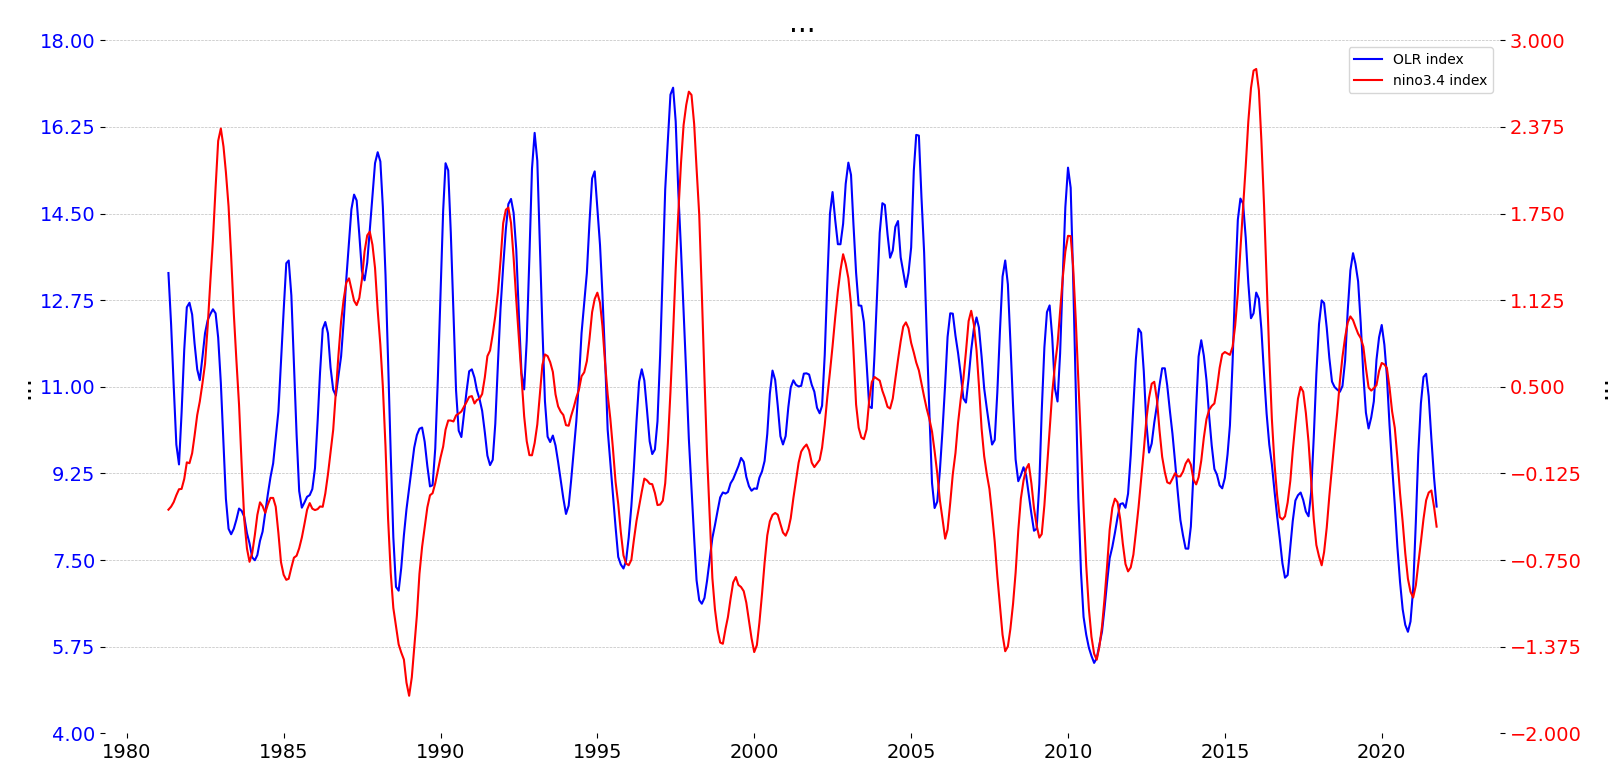

In [8]:
fig, ax1 = plt.subplots(figsize=(18,9))
title = ('...')
plt.title(title,fontsize=20)
plt.grid(axis='y',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.tick_params(axis='both',labelsize=14)
plot1 = ax1.plot(t,OLR_5,'b',label='OLR index')
ax1.set_ylabel('...', fontsize = 18)
ax1.set_ylim(4,18)
for tl in ax1.get_yticklabels():
    tl.set_color('b')    
ax2 = ax1.twinx()
plot2 = ax2.plot(t,d,'r',label='nino3.4 index')
ax2.set_ylabel('...',fontsize=18)
ax2.set_ylim(-2,3)
ax2.tick_params(axis='y',labelsize=14)
for tl in ax2.get_yticklabels():
    tl.set_color('r')                    

lines = plot1 + plot2           
ax1.legend(lines,[l.get_label() for l in lines])    
ax1.set_yticks(np.linspace(ax1.get_ybound()[0],ax1.get_ybound()[1],9)) 
ax2.set_yticks(np.linspace(ax2.get_ybound()[0],ax2.get_ybound()[1],9)) 
for ax in [ax1,ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)                       

In [9]:
# Try linear regression

In [10]:
res = stats.linregress(OLR_5,d)
print(res)

LinregressResult(slope=0.1811031527580234, intercept=-1.7985584068141556, rvalue=0.49173109763146855, pvalue=5.92317905349112e-31, stderr=0.014576984659871593, intercept_stderr=0.16172962973666455)


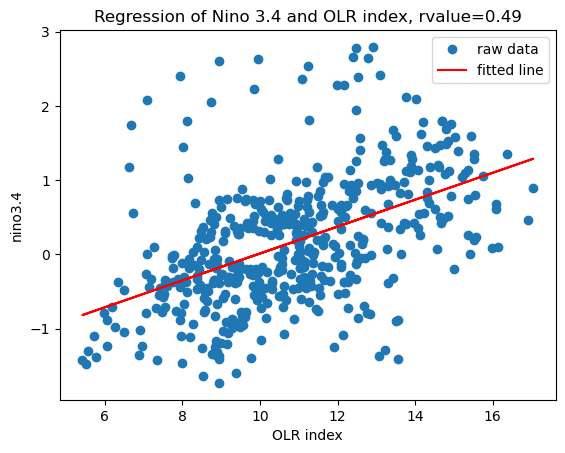

In [11]:
ax = plt.plot(OLR_5,d,'o',label='raw data')
plt.plot(OLR_5,res.intercept+res.slope*OLR_5,'r',label = 'fitted line')
plt.xlabel('OLR index')
plt.ylabel('nino3.4')
plt.title('Regression of Nino 3.4 and OLR index, rvalue=0.49')
plt.legend()
plt.show()